# EVALUATION DU MODULE 5 : CLASSIFICATION
Mame-Mor FALL CES Data Science 2016

## Comparaisons de différentes méthodes de classification (consignes)
On va comparer dans cette partie les différentes méthodes sur la base de donnée obtenue
comme dans le premier TP avec les commandes suivantes :
from sklearn.datasets import load_digits
digits = load_digits()
X, y = digits.data, digits.target
On suivra le protocole expérimental suivant : couper les données en deux parties 79% pour
l’apprentissage et 21% pour la validation (donner la taille des deux blocs choisis). Sur la partie
d’apprentissage on entraînera les méthodes suivantes :
– Naive Bayes
– LDA
– Régression logistique
– QDA
– KNN (en prenant comme nombre de voisins k = 1)
– KNN (en choisissant k par validation croisée (V-fold) avec V = 6)
– une autre méthode de votre choix
On validera leur performance en donnant :
1) la proportion d’erreurs de classification faite sur la partie des données gardée pour la validation
2) le score F1
3) Pour les méthodes mentionnées, proposer une synthèse sous forme de tableau ou de graphique, avec les renseignements suivants: – temps de calcul en seconde pris par chaque méthode pour la partie apprentissage (pour l’entraînement sur les 79% des données) - temps de calcul en seconde pris par chaque méthode pour la partie validation (sur les 21% restants)
- pourcentage d’erreurs de classification de chaque méthode
- le score F1
4) On affichera les matrices de confusion associées : celles de la meilleure et de la pire des méthodes obtenues (au sens du nombre d’erreurs commises) parmi celles étudiées. Commentez vos résultats
5) Proposer un (court) paragraphe synthétisant l’ensemble de vos expériences ci-dessus

### Naives Bayes

Premièrement nous devons importer la base de donnée digits sur laquelle nous allons entraîner les différents classifieurs durant ce TP (digits dataset comprennant 1797 images de 8x8 pixels manuscrites)

In [4]:
import numpy as np
from sklearn.datasets import load_digits
digits = load_digits()
X, y = digits.data, digits.target

In [18]:
print("dimension de X :",np.shape(X))
print("dimension de y :",np.shape(y))

dimension de X : (1797, 64)
dimension de y : (1797,)


La matrice X est composée des 1797 observations qui contiennent chacune 64 pixels (8x8) de description de l'image à travers un vecteur (1 dimension).
Le vecteur y contient les labels.
La première étape est de séparer les données en deux parties, une pour entraîner le classifieur (apprentissage) et la deuxième pour tester la généralisation du modèle sur des nouvelles données (test). Comme demandé dans l'énoncé nous divisons les données selon le ratio 79% 21% en utilisant la librairie sklearn.
Ensuite nous normaliserons l'ensemble d'apprentissage en retirant à chaque feature (colonnes des observations) la valeur moyenne vue sur l'ensemble d'apprentissage et en divisant chaque feature par l'écart type. Cette opération permet d'éviter que certains features ait un poids supérieur aux autres dans la prédiction par la normalisation des "range" d'évolution pour chaque feature. On fit l'opérateur de normalisation (standardscaler) sur l'ensemble d'apprentissage, et on utilise les paramètres vus lors de l'apprentissage pour normaliser ensuite l'ensemble de test inconnu.

In [22]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.21,random_state=50)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_stdtrain = scaler.fit_transform(X_train)
X_stdtest = scaler.transform(X_test)

In [23]:
print("dimension de X_stdtrain :",np.shape(X_stdtrain))
print("dimension de X_stdtest :",np.shape(X_stdtest))

dimension de X_stdtrain : (1419, 64)
dimension de X_stdtest : (378, 64)


La dimension de l'ensemble d'apprentissage est de 1419 observations, et la dimension de l'ensemble de test est de 378 observations.
On peut maintenant entraîner le classifieur naïf de Bayes sur l'ensemble d'apprentissage constitué et calculer les critères suivants :
- temps de calcul pour l'apprentissage
- temps de prédiction sur les données de test
- la proportion d'erreur sur les données
- la matrice de confusion (labels prédits sur l'ensemble des labels possibles. les vrais positifs sont sur la diagonale de cette matrice carrée)
- le score f1 par classe qui est un critère composé de la précision sur les scores prédits et sur le nombre d'éléments 

Le classifieur naïf de Bayes réalise une analyse discriminante dont on peut écrire les paramètres avec le théorème de Bayes comme le LDA et le QDA. Mais à la particularité de considérer les classes comme parfaitement indépendantes les unes des autres (matrice de covariance diagonales) sans pour autant que les variances soient identiques comme dans le LDA. Le résultat est un classifieur dont les hyperplans séparateurs de classes ne sont pas linéaires et dont les probabilités calculées pour les appartenances aux classes sont évidemment éronnées du fait de l'hypothèse de départ.

In [66]:
from sklearn.naive_bayes import GaussianNB
import timeit
clf_NB=GaussianNB()
start_time=timeit.default_timer()

clf_NB.fit(X_stdtrain,y_train)
fitGNB=timeit.default_timer()-start_time
print("temps d'apprentissage du classifieur Naive Bayes",fitGNB,"secondes")

start_time=timeit.default_timer()
y_pred=clf_NB.predict(X_stdtest)
predGNB=timeit.default_timer()-start_time
print("temps de prediction du classifieur Naive Bayes sur les donnees de test",predGNB,"secondes")

clf_NBscore=1-clf_NB.score(X_stdtest, y_test)
print("la proportion d'erreur du classieur Naive bayes est de",clf_NBscore)

from sklearn.metrics import confusion_matrix
clf_NBconfusionmatrix=confusion_matrix(y_test, y_pred)
print("la matrice de confusion du classifieur Naive Bayes : \n",clf_NBconfusionmatrix)

from sklearn.metrics import f1_score
clf_NBf1score=f1_score(y_test,y_pred, labels=[0,1,2,3,4,5,6,7,8,9],average=None)
print("le score f1 du classifieur Naive Bayes est de : \n",clf_NBf1score)

temps d'apprentissage du classifieur Naive Bayes 0.005944488370005274 secondes
temps de prediction du classifieur Naive Bayes sur les donnees de test 0.004784722994372714 secondes
la proportion d'erreur du classieur Naive bayes est de 0.306878306878
la matrice de confusion du classifieur Naive Bayes : 
 [[45  0  0  0  0  0  0  0  1  0]
 [ 0 16  0  0  0  0  0  1 27  0]
 [ 0  6 15  0  0  2  1  0 22  0]
 [ 0  0  0  8  0  0  0  1 20  1]
 [ 0  1  0  0 27  0  0  3  0  0]
 [ 0  0  1  0  0 28  0  3  2  1]
 [ 0  0  0  0  0  0 40  0  0  0]
 [ 0  0  0  0  0  0  0 37  0  0]
 [ 0  1  2  1  0  0  0  0 25  0]
 [ 1  0  0  0  1  2  0  5 10 21]]
le score f1 du classifieur Naive Bayes est de 
 [ 0.98  0.47  0.47  0.41  0.92  0.84  0.99  0.85  0.37  0.67]


On peut visualiser la matrice de confusion en utilisant la bibliothèque pyplot de matplotlib. On observe mieux ainsi les difficultés du classifieur pour dissocier certains labels.

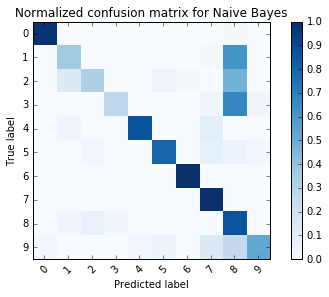

In [83]:
%matplotlib inline

import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(np.unique(y_test)))
    plt.xticks(tick_marks, np.unique(y_test), rotation=45)
    plt.yticks(tick_marks, np.unique(y_test))
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

plt.figure()
plot_confusion_matrix(cm=(clf_NBconfusionmatrix.astype('float')/clf_NBconfusionmatrix.sum(axis=1)[:,np.newaxis]), title='Normalized confusion matrix for Naive Bayes')
plt.show()


Interprétation du résultat :

Les résultats ne sont pas très bons (31% d'erreur), supérieurs au choix aléatoire quand même ! mais inférieurs aux résultats que nous verrons par la suite avec d'autres classifieurs. Ce classifieur est plutôt adapté aux problèmes en très grandes dimensions pour ses hypothèses simplificatrices qui réduisent les temps de calcul. Avec ce classifieur on cherche surtout à connaître la plus grande probabilité de classe pour l'attribution d'un label, le calcul de la probabilité de classe est lui eronné.

On remarque que les chiffres 1, 2 et 3 sont confondus avec les chiffres 8 notamment.

### Linear Discriminant Analysis

Nous entraînons maintenant le classifieur LDA sur les mêmes données pour comparer les résultats ultérieurement. Pour cela nous utilisons la librairie sklearn qui dispose de l'algorythme lda. Ensuite nous réalisons le calcul des mêmes paramètres que pour le classifieur naïf de Bayes plus haut.

Le classifieur LDA considère comme connu à priori la distribution des classes à déterminer et qu'elles sont gaussiennes. De plus le LDA considère que les variances des classes sont identiques ce qui est un postulat important qui à l'avantage de simplifier les calculs de probabilité d'appartenance aux classes utilisant la formule de Bayes. Le classifieur LDA attribue à chaque classe un centre (une moyenne) de la classe et on leur attribue une "moyenne" de toutes les variances observées dans les classes. Ainsi le classifieur prédit des lois de probabilités pour chaque classe en fonction d'une observation et attribue le label correspondant à la probabilité de la classe la plus élevée.

C:\Users\m413920\Documents\Python\WinPython-32bit-3.4.4.2\python-3.4.4\lib\site-packages\sklearn\discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


temps d'apprentissage du classifieur LDA 0.02932572156714741 secondes
temps de prediction du classifieur LDA sur les donnees de test 0.0007602818659506738 secondes
la proportion d'erreur du classieur LDA est de 0.0608465608466
la matrice de confusion du classifieur LDA : 
 [[45  0  0  0  0  0  1  0  0  0]
 [ 0 42  0  0  0  0  0  0  2  0]
 [ 0  2 43  1  0  0  0  0  0  0]
 [ 0  0  0 28  0  1  0  0  0  1]
 [ 0  1  0  0 30  0  0  0  0  0]
 [ 0  0  0  0  0 32  0  0  0  3]
 [ 0  0  0  0  0  0 40  0  0  0]
 [ 0  0  0  0  0  0  0 36  0  1]
 [ 0  5  0  0  0  0  0  0 23  1]
 [ 0  0  0  1  0  0  0  0  3 36]]
le score f1 du classifieur LDA est de 
 [ 0.99  0.89  0.97  0.93  0.98  0.94  0.99  0.99  0.81  0.88]


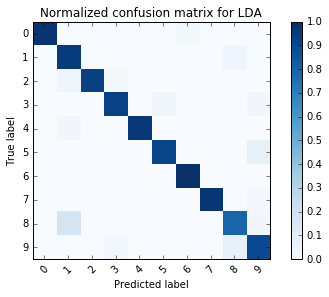

In [84]:
from sklearn.lda import LDA
import timeit
clf_LDA=LDA()
start_time=timeit.default_timer()

clf_LDA.fit(X_stdtrain,y_train)
fitLDA=timeit.default_timer()-start_time
print("temps d'apprentissage du classifieur LDA",fitLDA,"secondes")

start_time=timeit.default_timer()
y_pred=clf_LDA.predict(X_stdtest)
predLDA=timeit.default_timer()-start_time
print("temps de prediction du classifieur LDA sur les donnees de test",predLDA,"secondes")

clf_LDAscore=1-clf_LDA.score(X_stdtest, y_test)
print("la proportion d'erreur du classieur LDA est de",clf_LDAscore)

from sklearn.metrics import confusion_matrix
clf_LDAconfusionmatrix=confusion_matrix(y_test, y_pred)
print("la matrice de confusion du classifieur LDA : \n",clf_LDAconfusionmatrix)

from sklearn.metrics import f1_score
clf_LDAf1score=f1_score(y_test,y_pred, labels=[0,1,2,3,4,5,6,7,8,9],average=None)
print("le score f1 du classifieur LDA est de : \n",clf_LDAf1score)

plt.figure()
plot_confusion_matrix(cm=(clf_LDAconfusionmatrix.astype('float')/clf_LDAconfusionmatrix.sum(axis=1)[:,np.newaxis]), 
                      title='Normalized confusion matrix for LDA')
plt.show()

Interprétation du résultat :
Le classifieur LDA donne de bons résultats, un taux d'erreur de 6% seulement pour un temps/coût d'entraînement assez faible ce qui est satisfaisant étant donné les hypothèses du LDA. Cela démontre que malgré des fortes hypothèses comme une variance identique et une répartition gaussienne des classes on peut obtenir de très bons résultats de classification.

La plus forte erreur dans la matrice de confusion est entre le 8 confondu avec les 1. Ce qui est difficile à expliquer, le LDA ne permet pas (contrairement à la régression logistique) d'observer une matrice de poids par variable à explorer pour plus d'analyse.


Python nous fait la remarque que certaines variables sont collinéaires. C'est à dire que certains features (pixels sur les 64 pixels) peuvent s'obtenir par combinaison linéaire des autres. Mon opinion est que cette remarque est pertinente étant donné le set de données qui sont des pixels d'une même image. On s'attend effectivement à ce que les observations intraclasse (vecteur de 64 pixels) aient un maximum de ressemblances entre elles. Dans un cas idéal le classifieur serait entrainé sur des observations de 10 chiffres exactement identiques à l'intérieur d'une classe donc des variables réductibles en dimension (inf à 64) par combinaisons linéaires.

### Logistic regression

Nous entraînons maintenant le classifieur de régression logistique sur les mêmes données pour comparer les résultats ultérieurement. Pour cela nous utilisons la librairie sklearn qui dispose de l'algorythme de régression logistique. Ensuite nous réalisons le calcul des mêmes paramètres que plus haut.

Le classifieur de régression logistique, ici multiclasse, attribue pour une observation une probabilité d'appartenance comprise entre 0 et 1 pour chaque classe sur la base d'une fonction de prédiction appellée sigmoïd (1/1+e^-wx, x est le vecteur des obervations et w est la matrice de poids). Le classifieur attribue le label correspondant à la plus forte probabilité calculée. La fonction de coût du classifieur est convexe, il existe donc un minima global, étant donné un ensemble d'apprentissage,vers lequel une descente de gradient sur la fonction de coût (prédiction-true label)^2 converge. Comme pour le LDA le classifieur de régression logistique produit un ou des hyperplans spérateurs linéaires (par rapport aux variables) entre les classes mais contrairement au LDA le classifieur de regréssion logistique ne se base pas sur le postulat que les classes ont une variance gaussienne ce qui le rend plus généralisable mais moins stable lorsque les classes sont bien séparées. 

temps d'apprentissage du classifieur Logistic Regression 0.4729655848132097 secondes
temps de prediction du classifieur Logistic Regression sur les donnees de test 0.0005640928284265101 secondes
la proportion d'erreur du classieur Logistic Regression est de 0.0529100529101
la matrice de confusion du classifieur Logistic Regression : 
 [[45  0  0  0  0  0  0  0  1  0]
 [ 0 41  0  0  0  0  0  0  3  0]
 [ 0  1 45  0  0  0  0  0  0  0]
 [ 0  0  0 26  0  1  0  2  1  0]
 [ 0  1  0  0 30  0  0  0  0  0]
 [ 0  0  0  0  0 33  0  0  0  2]
 [ 0  0  0  0  0  0 40  0  0  0]
 [ 0  0  0  0  0  0  0 36  0  1]
 [ 0  2  0  0  1  0  2  0 24  0]
 [ 0  0  0  0  0  0  0  1  1 38]]
le score f1 du classifieur Logistic Regression est de 
 [ 0.99  0.92  0.99  0.93  0.97  0.96  0.98  0.95  0.81  0.94]


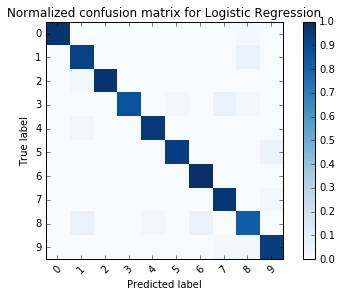

In [85]:
from sklearn.linear_model import LogisticRegression
import timeit
clf_LR=LogisticRegression()
start_time=timeit.default_timer()

clf_LR.fit(X_stdtrain,y_train)
fitLR=timeit.default_timer()-start_time
print("temps d'apprentissage du classifieur Logistic Regression",fitLR,"secondes")

start_time=timeit.default_timer()
y_pred=clf_LR.predict(X_stdtest)
predLR=timeit.default_timer()-start_time
print("temps de prediction du classifieur Logistic Regression sur les donnees de test",predLR,"secondes")

clf_LRscore=1-clf_LR.score(X_stdtest, y_test)
print("la proportion d'erreur du classieur Logistic Regression est de",clf_LRscore)

from sklearn.metrics import confusion_matrix
clf_LRconfusionmatrix=confusion_matrix(y_test, y_pred)
print("la matrice de confusion du classifieur Logistic Regression : \n",clf_LRconfusionmatrix)

from sklearn.metrics import f1_score
clf_LRf1score=f1_score(y_test,y_pred, labels=[0,1,2,3,4,5,6,7,8,9],average=None)
print("le score f1 du classifieur Logistic Regression est de : \n",clf_LRf1score)

plt.figure()
plot_confusion_matrix(cm=(clf_LRconfusionmatrix.astype('float')/clf_LRconfusionmatrix.sum(axis=1)[:,np.newaxis]), 
                      title='Normalized confusion matrix for Logistic Regression')
plt.show()

Interprétation du résultat :

Le classifieur de régression logistique produit ici des résultats très proches du LDA, il nous faudrait approfondir d'avantage pour estimer si l'écart de prédiction sur l'ensemble de test entre les deux classifieurs est significatif ou non. Ce que nous pouvons noter par contre c'est que le temps d'entraînement du classifieur de régression logistique est sensiblement supérieur à celui du LDA.


### QDA

Nous entraînons maintenant le classifieur Quadratic Discriminant Analysis sur les mêmes données pour comparer les résultats ultérieurement. Pour cela nous utilisons la librairie sklearn qui dispose de l'algorythme de QDA. Ensuite nous réalisons le calcul des mêmes paramètres que plus haut.

Le classifieur QDA, comme le LDA, considère à priori que les distributions intra classes sont gaussiennes. Par contre le QDA ne considère pas les variances comme identiques, nous avons donc une frontière de décision (hyperplan séparateur) qui n'est plus linéaire ce qui permet plus de flexibilité dans la définition des classes, mais au risque d'un overfitting sur les données d'apprentissage.

C:\Users\m413920\Documents\Python\WinPython-32bit-3.4.4.2\python-3.4.4\lib\site-packages\sklearn\qda.py:4: DeprecationWarning: qda.QDA has been moved to discriminant_analysis.QuadraticDiscriminantAnalysis in 0.17 and will be removed in 0.19.
  "in 0.17 and will be removed in 0.19.", DeprecationWarning)
C:\Users\m413920\Documents\Python\WinPython-32bit-3.4.4.2\python-3.4.4\lib\site-packages\sklearn\discriminant_analysis.py:688: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


temps d'apprentissage du classifieur QDA 0.023454261307051638 secondes
temps de prediction du classifieur QDA sur les donnees de test 0.004794196909642778 secondes
la proportion d'erreur du classieur QDA est de 0.230158730159
la matrice de confusion du classifieur QDA : 
 [[40  0  0  0  2  3  0  0  1  0]
 [ 0 31  0  0  0  0  0  2 11  0]
 [ 0  2 23  4  0  0  1  0 14  2]
 [ 0  0  0 13  0  1  0  1 13  2]
 [ 0  0  0  0 28  0  0  3  0  0]
 [ 0  0  1  0  0 31  0  3  0  0]
 [ 0  0  0  0  0  1 39  0  0  0]
 [ 0  0  0  0  0  0  0 37  0  0]
 [ 0  1  2  1  0  0  0  0 25  0]
 [ 0  0  0  0  0  3  0  5  8 24]]
le score f1 du classifieur QDA est de : 
 [ 0.93  0.79  0.64  0.54  0.92  0.84  0.97  0.84  0.5   0.71]


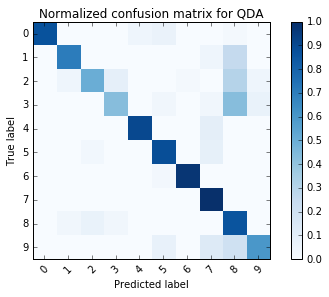

In [86]:
from sklearn.qda import QDA
import timeit
clf_QDA=QDA()
start_time=timeit.default_timer()

clf_QDA.fit(X_stdtrain,y_train)
fitQDA=timeit.default_timer()-start_time
print("temps d'apprentissage du classifieur QDA",fitQDA,"secondes")

start_time=timeit.default_timer()
y_pred=clf_QDA.predict(X_stdtest)
predQDA=timeit.default_timer()-start_time
print("temps de prediction du classifieur QDA sur les donnees de test",predQDA,"secondes")

clf_QDAscore=1-clf_QDA.score(X_stdtest, y_test)
print("la proportion d'erreur du classieur QDA est de",clf_QDAscore)

from sklearn.metrics import confusion_matrix
clf_QDAconfusionmatrix=confusion_matrix(y_test, y_pred)
print("la matrice de confusion du classifieur QDA : \n",clf_QDAconfusionmatrix)

from sklearn.metrics import f1_score
clf_QDAf1score=f1_score(y_test,y_pred, labels=[0,1,2,3,4,5,6,7,8,9],average=None)
print("le score f1 du classifieur QDA est de : \n",clf_QDAf1score)

plt.figure()
plot_confusion_matrix(cm=(clf_QDAconfusionmatrix.astype('float')/clf_QDAconfusionmatrix.sum(axis=1)[:,np.newaxis]), 
                      title='Normalized confusion matrix for QDA')
plt.show()

Interprétation du résultat :
Comme pour le classifieur naïf de Bayes on s'aperçoit que la flexibilité donné au modèle en relachant l'hypothèse de même variance intraclasse entraîne un overfitting sur l'ensemble d'apprentissage qui se généralise mal sur les données de test, ici l'erreur de 23% plaide assez sévèrement contre l'introduction de plus de variance dans le modèle, on préfèrera garder le biais inhérent au LDA.


Remarque variables collinéaires idem LDA.

### K nearest neighbors (with 1 neighbor)

Nous entraînons maintenant le classifieur K nearest neighbors avec 1 seul voisin sur les mêmes données pour comparer les résultats ultérieurement. Pour cela nous utilisons la librairie sklearn qui dispose de l'algorythme de KNN. Ensuite nous réalisons le calcul des mêmes paramètres que plus haut.

Le classifieur KNN est un classifieur "simple" qui ne se base sur aucun modèle "à priori" de distribution intra classes. Ce classifieur attribue à une observation X la moyenne pondérée des K plus proches voisins autours de lui vu dans la base d'apprentissage. On comprend intuitivement que ce modèle sera extrêmement flexible plus K est petit et que la difficulté sera dans la généralisation du modèle à de nouvelles données.

temps d'apprentissage du classifieur KNN1 0.007721637361100875 secondes
temps de prediction du classifieur KNN1 sur les donnees de test 0.06282628269764245 secondes
la proportion d'erreur du classieur KNN1 est de 0.0291005291005
la matrice de confusion du classifieur KNN1 : 
 [[46  0  0  0  0  0  0  0  0  0]
 [ 0 44  0  0  0  0  0  0  0  0]
 [ 0  0 46  0  0  0  0  0  0  0]
 [ 0  0  0 29  0  0  0  1  0  0]
 [ 0  1  0  0 30  0  0  0  0  0]
 [ 0  0  0  1  0 33  0  0  0  1]
 [ 0  0  0  0  0  0 40  0  0  0]
 [ 0  0  0  0  0  0  0 36  0  1]
 [ 0  0  1  2  0  0  0  0 26  0]
 [ 0  1  0  1  0  0  0  0  1 37]]
le score f1 du classifieur KNN1 est de : 
 [ 1.    0.98  0.99  0.92  0.98  0.97  1.    0.97  0.93  0.94]


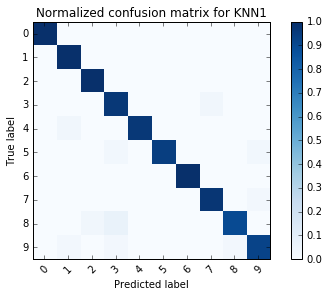

In [112]:
from sklearn.neighbors import KNeighborsClassifier
import timeit
clf_KNN1=KNeighborsClassifier(n_neighbors=1)
start_time=timeit.default_timer()

clf_KNN1.fit(X_stdtrain,y_train)
fitKNN1=timeit.default_timer()-start_time
print("temps d'apprentissage du classifieur KNN1",fitKNN1,"secondes")

start_time=timeit.default_timer()
y_pred=clf_KNN1.predict(X_stdtest)
predKNN1=timeit.default_timer()-start_time
print("temps de prediction du classifieur KNN1 sur les donnees de test",predKNN1,"secondes")

clf_KNN1score=1-clf_KNN1.score(X_stdtest, y_test)
print("la proportion d'erreur du classieur KNN1 est de",clf_KNN1score)

from sklearn.metrics import confusion_matrix
clf_KNN1confusionmatrix=confusion_matrix(y_test, y_pred)
print("la matrice de confusion du classifieur KNN1 : \n",clf_KNN1confusionmatrix)

from sklearn.metrics import f1_score
clf_KNN1f1score=f1_score(y_test,y_pred, labels=[0,1,2,3,4,5,6,7,8,9],average=None)
print("le score f1 du classifieur KNN1 est de : \n",clf_KNN1f1score)

plt.figure()
plot_confusion_matrix(cm=(clf_KNN1confusionmatrix.astype('float')/clf_KNN1confusionmatrix.sum(axis=1)[:,np.newaxis]), 
                      title='Normalized confusion matrix for KNN1')
plt.show()

Interprétation des résultats :
C'est un excellent score ! Le modèle choisi qui attribue à une nouvelle observation le label de l'observation la plus proche vue sur l'ensemble d'apprentissage (distance minkowski équivalent à la distance euclidienne) se généralise très bien sur les données de test avec seulement 3% d'erreur. Le temps d'apprentissage du modèle est par ailleurs très faible. Le temps de calcul est lui plus long car la distance entre chaque observation et son plus proche voisin doit être calculée à chaque fois.

### K nearest neighbors (K to be found trough cross validation)

Dans un premier temps nous allons utiliser la méthode de validation croisée V-fold pour trouver le meilleur hyperparamètre K (nombre de voisins à prendre en compte). Cette méthode d'optimisation divise les observations d'apprentissage en plusieurs volumes et à chaque itération nous allons tester un nombre de voisins à prendre en compte différent en faisant l'apprentissage sur V-1 volumes de données et en testant le résultat sur les données laissées de côté dans le volume restant. Avec cette méthode nous utilisons les données d'apprentissage que nous avons au mieux pour éviter le surapprentissage grâce aux données que nous gardons de côté à chaque itération pour tester la généralisation du modèle.

In [111]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import cross_val_score
scores = {}
for k in range(1,9) :
    clf_KNN=KNeighborsClassifier(n_neighbors=k)
    scores[k] = np.mean(cross_val_score(clf_KNN, X_stdtrain, y_train, cv=6, scoring='accuracy'))
print(scores)
print("le score le plus élevé est",max(scores.values()))

{1: 0.9725136218805871, 2: 0.96685738324448989, 3: 0.97464468959445805, 4: 0.9703770697685089, 5: 0.9718340780786584, 6: 0.96758729380315678, 7: 0.96831159473481188, 8: 0.96336745879067942}
le score le plus élevé est 0.974644689594


On obtient le score le plus élevé pour le classifieur utilisant les 3 plus proches voisins pour la classification (k=3).

temps d'apprentissage du classifieur KNN3 0.006665690325462492 secondes
temps de prediction du classifieur KNN3 sur les donnees de test 0.06866103152788128 secondes
la proportion d'erreur du classieur KNN3 est de 0.0291005291005
la matrice de confusion du classifieur KNN3 : 
 [[46  0  0  0  0  0  0  0  0  0]
 [ 0 44  0  0  0  0  0  0  0  0]
 [ 0  0 46  0  0  0  0  0  0  0]
 [ 0  0  0 29  0  0  0  1  0  0]
 [ 0  1  0  0 30  0  0  0  0  0]
 [ 0  0  0  0  0 34  0  0  0  1]
 [ 0  0  0  0  0  0 40  0  0  0]
 [ 0  0  0  0  0  0  0 36  0  1]
 [ 0  0  0  2  0  0  0  0 27  0]
 [ 0  0  0  0  0  0  0  0  1 39]]
le score f1 du classifieur KNN3 est de : 
 [ 1.    0.99  1.    0.95  0.98  0.99  1.    0.97  0.95  0.96]


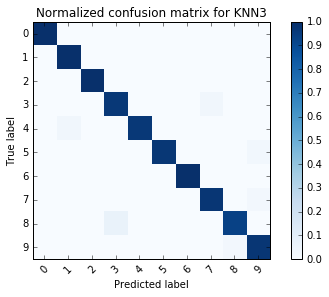

In [113]:
from sklearn.neighbors import KNeighborsClassifier
import timeit
clf_KNN3=KNeighborsClassifier(n_neighbors=3)
start_time=timeit.default_timer()

clf_KNN3.fit(X_stdtrain,y_train)
fitKNN3=timeit.default_timer()-start_time
print("temps d'apprentissage du classifieur KNN3",fitKNN3,"secondes")

start_time=timeit.default_timer()
y_pred=clf_KNN3.predict(X_stdtest)
predKNN3=timeit.default_timer()-start_time
print("temps de prediction du classifieur KNN3 sur les donnees de test",predKNN3,"secondes")

clf_KNN3score=1-clf_KNN3.score(X_stdtest, y_test)
print("la proportion d'erreur du classieur KNN3 est de",clf_KNNscore)

from sklearn.metrics import confusion_matrix
clf_KNN3confusionmatrix=confusion_matrix(y_test, y_pred)
print("la matrice de confusion du classifieur KNN3 : \n",clf_KNN3confusionmatrix)

from sklearn.metrics import f1_score
clf_KNN3f1score=f1_score(y_test,y_pred, labels=[0,1,2,3,4,5,6,7,8,9],average=None)
print("le score f1 du classifieur KNN3 est de : \n",clf_KNN3f1score)

plt.figure()
plot_confusion_matrix(cm=(clf_KNN3confusionmatrix.astype('float')/clf_KNN3confusionmatrix.sum(axis=1)[:,np.newaxis]), 
                      title='Normalized confusion matrix for KNN3')
plt.show()

Interprétation des résultats :
Résultats excellents à nouveau. L'amélioration n'est toutefois pas réellement notable par rapport au KNN avec 1 seul plus proche voisin.

### Support Vector Classifier

Nous entraînons maintenant le classifieur Support Vector Classifier (SVC) sur les mêmes données pour comparer les résultats ultérieurement. Pour cela nous utilisons la librairie sklearn qui dispose de l'algorythme de SVC. Ensuite nous réalisons le calcul des mêmes paramètres que plus haut.

Le Support Vector Classifier est un classifieur qui recherche à situer des hyperplans séparateurs linéaires (sans utiliser de kernel) qui maximise la marge vis à vis de chacune des classes séparées. Le SVC est un classifieur très stable car il n'est défini que par les points les plus "proches" appartenant à deux classes différentes à travers lesquels sont positionnés les vecteurs support.

temps d'apprentissage du classifieur SVC 0.10164092195191188 secondes
temps de prediction du classifieur SVC sur les donnees de test 0.02373453135805903 secondes
la proportion d'erreur du classieur SVC est de 0.0238095238095
la matrice de confusion du classifieur SVC : 
 [[45  0  0  0  1  0  0  0  0  0]
 [ 0 44  0  0  0  0  0  0  0  0]
 [ 0  0 46  0  0  0  0  0  0  0]
 [ 0  0  0 29  0  1  0  0  0  0]
 [ 0  0  0  0 31  0  0  0  0  0]
 [ 0  0  0  0  1 33  0  0  0  1]
 [ 0  0  0  0  0  0 40  0  0  0]
 [ 0  0  0  0  0  0  0 36  0  1]
 [ 0  1  1  1  1  0  0  0 25  0]
 [ 0  0  0  0  0  0  0  0  0 40]]
le score f1 du classifieur SVC est de : 
 [ 0.99  0.99  0.99  0.97  0.95  0.96  1.    0.99  0.93  0.98]


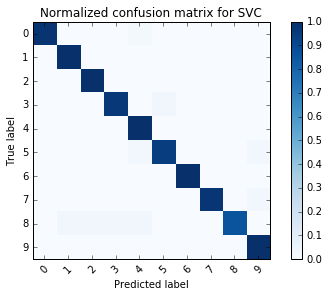

In [118]:
from sklearn.svm import SVC
import timeit
clf_SVC=SVC()
start_time=timeit.default_timer()

clf_SVC.fit(X_stdtrain,y_train)
fitSVC=timeit.default_timer()-start_time
print("temps d'apprentissage du classifieur SVC",fitSVC,"secondes")

start_time=timeit.default_timer()
y_pred=clf_SVC.predict(X_stdtest)
predSVC=timeit.default_timer()-start_time
print("temps de prediction du classifieur SVC sur les donnees de test",predSVC,"secondes")

clf_SVCscore=1-clf_SVC.score(X_stdtest, y_test)
print("la proportion d'erreur du classieur SVC est de",clf_SVCscore)

from sklearn.metrics import confusion_matrix
clf_SVCconfusionmatrix=confusion_matrix(y_test, y_pred)
print("la matrice de confusion du classifieur SVC : \n",clf_SVCconfusionmatrix)

from sklearn.metrics import f1_score
clf_SVCf1score=f1_score(y_test,y_pred, labels=[0,1,2,3,4,5,6,7,8,9],average=None)
print("le score f1 du classifieur SVC est de : \n",clf_SVCf1score)

plt.figure()
plot_confusion_matrix(cm=(clf_SVCconfusionmatrix.astype('float')/clf_SVCconfusionmatrix.sum(axis=1)[:,np.newaxis]), 
                      title='Normalized confusion matrix for SVC')
plt.show()

Interprétation des résultats :
C'est le meilleur résultat obtenu dans ce TP avec seulement 2.3% de taux d'erreur. Cela pour un temps d'entraînement supérieur aux autres (sauf régression logistique) mais tout à fait raisonnable et des prédictions rapides. Ici nous utilisons le SVC par défaut de sklearn qui utilise un noyau gaussien (données non séparables linéairement) ce qui permet une flexibilité supplémentaire du classifieur en utilisant un espace de représentation à plus grande dimension. Le résultat est particulièrement efficace et stable dans notre cas présent. 

On remarque que l'erreur commise sur la classe 8 à travers tous les autres classifieur est ici d'avantage distribuée que pour les autres classifieurs, elle se retrouve sur les 1,2,3 et 4.

### Closing remarks

A travers ce TP nous avons pu comparer plusieurs classifieurs utilisant des philosophies très différentes :
- le LDA, QDA et le classifieur de Bayes qui présupposent une loi de distribution des données gausienne, ces méthodes sont rapides à "apprendre". On s'est aperçu que les classifieurs plus flexibles comme le QDA et le classifieur Naïf de Bayes donnent de moins bons résultats sur l'ensemble de test.
- le KNN qui est une méthode dite "non paramètrique" qui a donné de très bons résultats malgré sa simplicité.
- la régression logistique et le SVC qui ont donné d'excellents résultats et qui ne présupposent pas de loi de distribution de données, ces méthodes s'appliquent uniquement à définir les hyperplans séparateurs linéaires (ou non, voir méthode des noyaux) les plus efficaces. Ces deux méthodes sont plus consommatrices en temps d'apprentissage.

### Gaussian density graph representation 

6) Écrire une fonction qui affiche le graphe (tridimensionnel) d’une densité de gaussienne en dimension deux et qui prend en entrée un vecteur de moyenne mu = [mu1;mu2] et une matrice de covariance symétrique Sigma. On veillera à donner un message d’erreur “Matrice Sigma non-symétrique” dans le cas où la matrice Sigma en entrée n’est pas symétrique.
Insérer les graphes dans votre document pour :
Sigma :
[[1/5 1/10]
 [1/10 1/5]]

et
Sigma :
[[1/5 -2/10]
[􀀀2=10 3=5]]

Par simplicité on pourra prendre mu1 = mu2 = 0.

Ci-dessous la fonction définie en accord avec les consignes de l'énoncé et les graphes obtenus. On utilise la fonction de génération de gausienne multivariée de Numpy et la librairie d'affichage matplotlib.

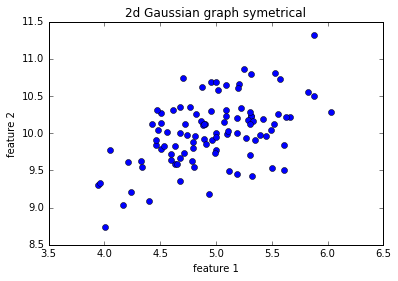

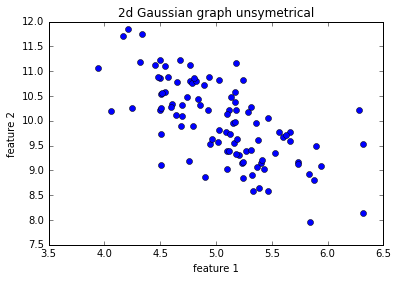

In [37]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
mu=np.array([5,10])
sigma=np.array([[0.2,0.1],[0.1,0.2]])
sigma2=np.array([[0.2,-0.2],[-0.2,0.6]])

def plot_gaussian(mu, sigma, title='2d Gaussian graph'):
    x,y=np.random.multivariate_normal(mu,sigma,100).T
    if np.array_equal(sigma.transpose(),sigma)==False : print('Matrice Sigma non-symétrique')
    plt.title(title)
    plt.plot(x, y,'o')
    plt.xlabel('feature 1')
    plt.ylabel('feature 2')
    plt.show()

plot_gaussian(mu,sigma,title='2d Gaussian graph symetrical')
plot_gaussian(mu,sigma=sigma2,title='2d Gaussian graph unsymetrical')